In [1]:
import tpx3awkward as tpx3

In [2]:
### Example on how to cluster/centroid data from a single rax .tpx3 file (step by step)

In [3]:
fpath = '/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3dev/jgoodrich/127682_000008.tpx3'

In [4]:
raw_df = tpx3.raw_to_sorted_df(fpath)
print(raw_df)

            x    y  pix_addr    ToA  ToT  FToA  SPIDR  chip_number  \
0         208  131     53507  12387  500    14  62638            3   
1         103  278     39377    802  575    15  62639            2   
2         391  215     34735    929  500    14  62639            0   
3          11   26      2614   1408  500    13  62639            3   
4           0  455     65140   1751  300    10  62639            2   
...       ...  ...       ...    ...  ...   ...    ...          ...   
12873265  441  405     18130   3374  500     5   4809            1   
12873266  466  443     11404   3439  400     2   4809            1   
12873267  467  443     11400   3440  125     8   4809            1   
12873268  317  431     49824   3711  425    15   4809            1   
12873269  317  430     49825   3715   25     6   4809            1   

             basetime       timestamp  
0                   0   4203615758848  
1                   0   4203635414016  
2                   0   4203635934464  

In [5]:
cent_df_test = tpx3.raw_df_to_cluster_df(raw_df)
print(cent_df_test)

                      t          xc          yc  ToT_max  ToT_sum  n
0         4203615758848  208.000000  131.000000      500      500  1
1         4203635414016  103.000000  278.000000      575      575  1
2         4203635934464  391.000000  215.000000      500      500  1
3         4203637897216   11.000000   26.000000      500      500  1
4         4203639305728    0.294118  455.000000      300      425  2
...                 ...         ...         ...      ...      ... ..
9415262  44303205204736   50.571430  256.000000      400      700  2
9415263  44303205269760  481.000000   75.789474      375      475  2
9415264  44303205459712  441.000000  405.000000      500      500  1
9415265  44303205725952  466.238098  443.000000      400      525  2
9415266  44303206838016  317.000000  430.944458      425      450  2

[9415267 rows x 6 columns]


In [6]:
cond_raw_df = tpx3.condense_raw_df(raw_df)
print(cond_raw_df)

                       t    x    y  ToT
0          4203615758848  208  131  500
1          4203635414016  103  278  575
2          4203635934464  391  215  500
3          4203637897216   11   26  500
4          4203639305728    0  455  300
...                  ...  ...  ...  ...
12873265  44303205459712  441  405  500
12873266  44303205725952  466  443  400
12873267  44303205728512  467  443  125
12873268  44303206838016  317  431  425
12873269  44303206856704  317  430   25

[12873270 rows x 4 columns]


In [7]:
filt_cond_raw_df = tpx3.drop_zero_tot(cond_raw_df)
print(filt_cond_raw_df)

                       t    x    y  ToT
0          4203615758848  208  131  500
1          4203635414016  103  278  575
2          4203635934464  391  215  500
3          4203637897216   11   26  500
4          4203639305728    0  455  300
...                  ...  ...  ...  ...
12873265  44303205459712  441  405  500
12873266  44303205725952  466  443  400
12873267  44303205728512  467  443  125
12873268  44303206838016  317  431  425
12873269  44303206856704  317  430   25

[12873221 rows x 4 columns]


In [8]:
events, clusters = tpx3.neighbor_set_from_df(filt_cond_raw_df)

In [9]:
num_clusters, max_cluster = tpx3.cluster_stats(clusters)

In [10]:
cluster_arr = tpx3.create_cluster_arr(clusters, num_clusters, max_cluster)

In [11]:
centroid_np = tpx3.cent_to_numpy(cluster_arr, events, num_clusters, max_cluster)

In [12]:
centroid_df = tpx3.cent_to_df(centroid_np)
print(centroid_df)

                      t          xc          yc  ToT_max  ToT_sum  n
0         4203615758848  208.000000  131.000000      500      500  1
1         4203635414016  103.000000  278.000000      575      575  1
2         4203635934464  391.000000  215.000000      500      500  1
3         4203637897216   11.000000   26.000000      500      500  1
4         4203639305728    0.294118  455.000000      300      425  2
...                 ...         ...         ...      ...      ... ..
9415262  44303205204736   50.571430  256.000000      400      700  2
9415263  44303205269760  481.000000   75.789474      375      475  2
9415264  44303205459712  441.000000  405.000000      500      500  1
9415265  44303205725952  466.238098  443.000000      400      525  2
9415266  44303206838016  317.000000  430.944458      425      450  2

[9415267 rows x 6 columns]


In [13]:
### Example on how to cluster/centroid data in a directory

In [14]:
directory = '/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/'
cluster = True
sid = '127682'
save_dir = '/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3dev/jgoodrich/test/data/'
save_raw = True
save_cent = True
prints = True
tpx3.convert_directory(directory, cluster = cluster, sid = sid, save_dir = save_dir, save_raw = save_raw, save_cent = save_cent, prints = prints)

-> Converting /nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/ with filename containing 127682
--> Loading "/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/127682_000031.tpx3" (156.563768 MB, sid="127682_000031"): Mon Mar 20 15:53:03 2023--> Loading "/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/127682_000001.tpx3" (154.764384 MB, sid="127682_000001"): Mon Mar 20 15:53:03 2023--> Loading "/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/127682_000083.tpx3" (152.863192 MB, sid="127682_000083"): Mon Mar 20 15:53:03 2023
--> Loading "/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/127682_000010.tpx3" (157.278344 MB, sid="127682_000010"): Mon Mar 20 15:53:03 2023
--> Loading "/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/127682_000012.tpx3" (156.871208 MB, sid="127682_000012"): Mon Mar 20 15:53:03 2023
--> Loading "/nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3data/127682_000054.tpx3" (154.55432 MB, sid="12

In [15]:
concat_centroid_df = tpx3.concat_data_seq(save_dir, sid, 'centroid', True, True)
print(concat_centroid_df)

-> Concatenating /nsls2/data/chx/legacy/analysis/2023_1/qmicroscope/tpx3dev/jgoodrich/test/data/ with filename containing 127682: Mon Mar 20 16:10:48 2023


100%|██████████| 114/114 [01:11<00:00,  1.61it/s]


-> Concatenating dataframe list: Mon Mar 20 16:11:59 2023
-> Concatenating complete: Mon Mar 20 16:12:43 2023
-> Saving all 127682 centroid to "127682_all_centroid.h5": Mon Mar 20 16:12:43 2023
-> Saving complete.
                            t          xc     yc  ToT_max  ToT_sum  n
0               2910935162624  502.000000  250.0      425      425  1
1               2910936408576  316.000000  118.0      475      475  1
2               2910939407616  445.000000  123.0      475      475  1
3               2910940202752  258.000000   75.0      525      525  1
4               2910940608256  474.666656  250.0      350      525  2
...                       ...         ...    ...      ...      ... ..
1085505826  33855488997734912  288.000000  474.0      500      500  1
1085505827  33855488998039296  259.000000  484.0      600      600  1
1085505828  33855488998145792  482.000000  178.0      475      475  1
1085505829  33855489000146688  211.000000  376.0      475      475  1
1085505830  3385

In [16]:
import matplotlib.pyplot as plt

data = tpx3.add_centroid_cols(concat_centroid_df)
print(data)

                            t          xc     yc  ToT_max  ToT_sum  n    x  \
0               2910935162624  502.000000  250.0      425      425  1  502   
1               2910936408576  316.000000  118.0      475      475  1  316   
2               2910939407616  445.000000  123.0      475      475  1  445   
3               2910940202752  258.000000   75.0      525      525  1  258   
4               2910940608256  474.666656  250.0      350      525  2  475   
...                       ...         ...    ...      ...      ... ..  ...   
1085505826  33855488997734912  288.000000  474.0      500      500  1  288   
1085505827  33855488998039296  259.000000  484.0      600      600  1  259   
1085505828  33855488998145792  482.000000  178.0      475      475  1  482   
1085505829  33855489000146688  211.000000  376.0      475      475  1  211   
1085505830  33855489000527104  233.000000  397.0      525      525  1  233   

              y          t_ns  
0           250  1.776694e+10  

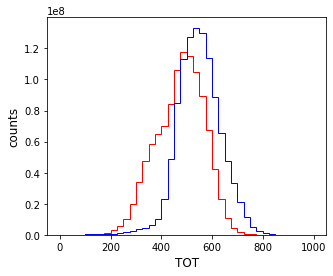

In [17]:
fig, ax0 = plt.subplots(ncols=1, figsize=(5, 4))
plt.hist(data['ToT_max'], bins = 40, range = (0, 1000), color = 'r', histtype = 'step') # any thoughts on how we could speed up the histogram functions?
plt.hist(data['ToT_sum'], bins = 40, range = (0, 1000), color = 'b', histtype = 'step')
plt.xlabel('TOT',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

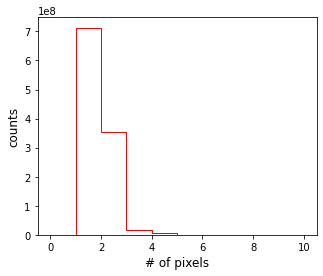

In [18]:
fig, ax0 = plt.subplots(ncols=1, figsize=(5, 4))
plt.hist(data['n'], bins = 10, range = (0, 10), color = 'r', histtype = 'step')
plt.xlabel('# of pixels',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

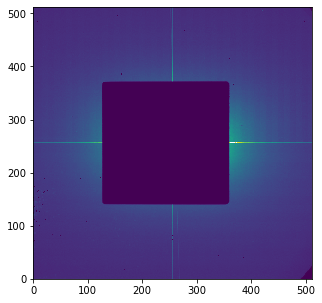

In [19]:
npixels = 512

fig, ax0 = plt.subplots(ncols=1, figsize=(5, 5))
plt.hist2d(data['x'], data['y'], bins = npixels, range = [(0, npixels), (0, npixels)], cmax = 30000)
plt.show()

In [20]:
### Will push update with more SPDC-analysis functions soon!